# Data 100 - Project 2 (personal)


In the second section of the project, students were to create a revised model of their own that successfully classified spam vs ham emails with at least 88% accuracy and used the Logistic Regression model. 

While the model I designed in the project that I submitted for class used the words_in_texts feature function (as seen below) that extracted 60 + words commonly found in spam emails, I attempted to play with the nltk library in an attempt to better my understanding of NLP libraries and create a model with a higher accuracy.

In [20]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [21]:
from utils import fetch_and_cache_gdrive
fetch_and_cache_gdrive('1SCASpLZFKCp2zek-toR3xeKX3DZnBSyp', 'train.csv')
fetch_and_cache_gdrive('1ZDFo9OTF96B5GP2Nzn8P8-AL7CTQXmC0', 'test.csv')

original_training_data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

Using version already downloaded: Sun Nov 22 17:15:58 2020
MD5 hash of file: 0380c4cf72746622947b9ca5db9b8be8
Using version already downloaded: Sun Nov 22 17:16:00 2020
MD5 hash of file: a2e7abd8c7d9abf6e6fafc1d1f9ee6bf


,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0


In [22]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)

from sklearn.linear_model import LogisticRegression

In [23]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = []
    for i in texts:
        temp = []
        for j in words:
            if j in i:
                temp.append(1)
            else:
                temp.append(0)
        indicator_array.append(temp)
    return np.array(indicator_array)

In [24]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import string
stop = nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
cv = CountVectorizer()
vectorized = cv.fit_transform(train["email"])
x_tr, x_tst, y_tr, y_tst = train_test_split(vectorized, train["spam"], test_size=0.2, random_state=42)
m = LogisticRegression()
m.fit(x_tr, y_tr)
my_acc = np.mean(m.predict(x_tr) == y_tr)
my_acc

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9998336106489185

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Text(0.5, 1.0, 'Different Positive Rates')

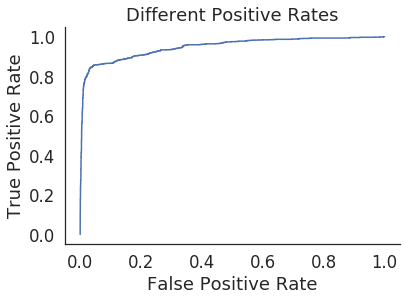

In [26]:
from sklearn.metrics import roc_curve

# Note that you'll want to use the .predict_proba(...) method for your classifier
# instead of .predict(...) so you get probabilities, not classes

m9 = LogisticRegression(penalty="none", solver="saga")
m9.fit(x_tr, y_tr)

model_probabilities = m9.predict_proba(x_tr)[:, 1]
fp, tp, thresholds = roc_curve(y_tr, model_probabilities)
with sns.axes_style("white"):
    plt.plot(fp, tp)
    
sns.despine()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Different Positive Rates")

As seen above, my model that uses nltk and the Count Vectorizer offered through Seaborn performs at a training accuracy of 99%!